In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Random components with 162 concepts
k = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
random_top_k_sweep_acc = np.array([87.21, 90.63, 92.13, 92.87, 93.43, 93.50, 93.26, 93.48, 93.13, 93.04, 91.46])
std_dev_random = np.array([0.65, 0.56, 0.53, 0.50, 0.48, 0.48, 0.49, 0.48, 0.48, 0.48, 0.52])

In [3]:
# Dendrogram components with 235 entries and varying concepts
n = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
dendro_n_sweep_acc = np.array([91.00, 91.35, 91.59, 92.38, 91.72, 92.77, 93.33, 92.96, 93.14, 93.13])
std_devs_dendro = np.array([0.55, 0.53, 0.54, 0.51, 0.54, 0.51, 0.48, 0.48, 0.49, 0.49])

Text(0.5, 1.0, 'Random concepts')

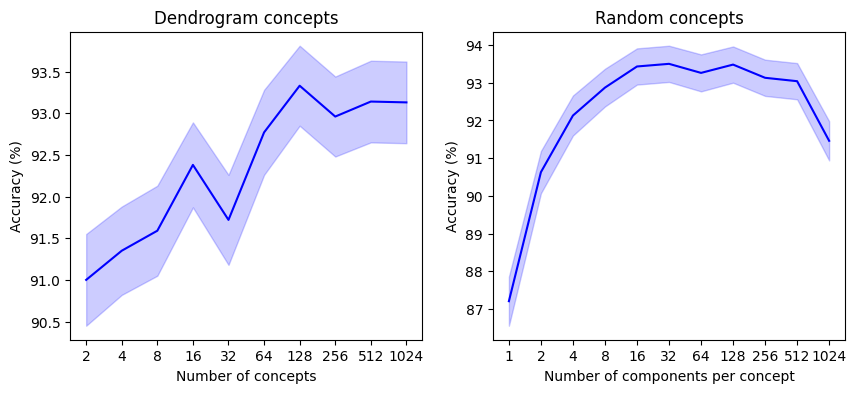

In [7]:
lower_bound_random = random_top_k_sweep_acc - std_dev_random
upper_bound_random = random_top_k_sweep_acc + std_dev_random

lower_bound_dendro = dendro_n_sweep_acc - std_devs_dendro
upper_bound_dendro = dendro_n_sweep_acc + std_devs_dendro

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Dendrogram components with 235 entries and varying concepts
sns.lineplot(x=range(len(n)), y=dendro_n_sweep_acc, color='blue', ax=axs[0])
axs[0].fill_between(range(len(n)), lower_bound_dendro, upper_bound_dendro, color='blue', alpha=0.2)
axs[0].set_xticks(range(len(n)))
axs[0].set_xticklabels(n)
axs[0].set_xlabel('Number of concepts')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Dendrogram concepts')

# Random components with 162 concepts
sns.lineplot(x=range(11), y=random_top_k_sweep_acc, color='blue', ax=axs[1])
axs[1].fill_between(range(11), lower_bound_random, upper_bound_random, color='blue', alpha=0.2)
axs[1].set_xticks(range(11))
axs[1].set_xticklabels(k)
axs[1].set_xlabel('Number of components per concept')
axs[1].set_ylabel('Accuracy (%)')
axs[1].set_title('Random concepts')

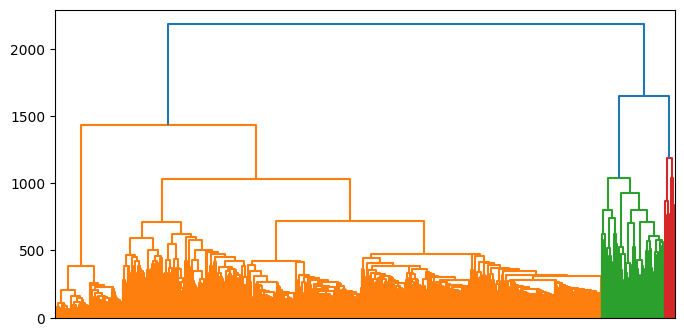

In [11]:
import torch
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
Z = torch.load('data\\comet\\tabula_muris\\linkage.pt')
plt.figure(figsize=(8, 4))
dn = hierarchy.dendrogram(Z)
# remove xticks
plt.xticks([])
plt.show()